In [52]:
import minsnap_trajectories as ms
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
alt = 3
x0 = 3.2
y0 = 0.0
theta0 = 0
xf = 10.0
yf = -20.0
control_point = [(x0, y0, 0),  (35.0, 0.0, alt), (45.0, 0.0, alt), (45.0, 25.0, alt), (-8.0, 25.0, alt), (-10.0, 1.0,alt), (5, -15.0, 2.0), (xf, yf,0.1)]
# control_point = [(x0, y0, 0),  (35.0, 0.0, alt), (45.0, 25.0, alt), (-8.0, 25.0, alt), (-10.0, 1.0,alt), (5, -15.0, 2.0), (xf, yf,0.1)]
refs = []
# calculate straight line distance between waypoints
time_stamp = [0.0]
control_point_np = np.array(control_point)
for i in range(len(control_point)-1):
    dist = np.linalg.norm(control_point_np[i+1] - control_point_np[i], ord=2)
    print(dist)
    time_stamp.append(np.sqrt(dist) + time_stamp[i])
time_stamp = np.array(time_stamp)
print(time_stamp)
for i in range(len(control_point)):
    refs.append(ms.Waypoint(
        time=time_stamp[i],
        position=np.array(control_point[i]),
    ))
refs[0][1] = np.array([0.0,0.0,0.0]) # this is to set start velocity as 0
refs[-1][1] = np.array([0.0,0.0,0.0]) # this is to set end velocity as 0
# refs = [
#     ms.Waypoint(
#         time=0.0,
#         position=np.array(control_point[0]),
#         velocity=np.array([0.0,0.0,0.0]),
#     ),
#     ms.Waypoint(  # Any higher-order derivatives
#         time=10.0,
#         position=np.array(control_point[1]),
#         # velocity=np.array([0.0, 5.0, 0.0]),
#         # acceleration=np.array([0.1, 0.0, 0.0]),
#     ),
#     ms.Waypoint(  # Potentially leave intermediate-order derivatives unspecified
#         time=20.0,
#         position=np.array([20.0, 0.0, 10.0]),
#         # velocity=np.array([0.0,0.0,0.0]),
#         # jerk=np.array([0.1, 0.0, 0.2]),
#     ),
# ]

31.941195970094796
10.0
25.0
53.0
24.08318915758459
21.95449840010015
7.321885003194191
[ 0.          5.65165427  8.81393193 13.81393193 21.09404182 26.00150442
 30.68706718 33.39296537]


In [53]:
polys = ms.generate_trajectory(
    refs,
    degree=8,  # Polynomial degree
    idx_minimized_orders=(3, 4),  
    num_continuous_orders=4,  
    algorithm="constrained",  # "closed-form" or "constrained"
)
# print("polys", polys)
t = np.linspace(0, time_stamp[-1], 100)
#  Sample up to the 3rd order (Jerk) -----v
pva = ms.compute_trajectory_derivatives(polys, t, 3)
position = pva[0, ...]
# Inspect the output
t = polys.time_reference
dt = polys.durations
cfs = polys.coefficients
(t, dt)

(array([ 0.        ,  5.65165427,  8.81393193, 13.81393193, 21.09404182,
        26.00150442, 30.68706718, 33.39296537]),
 array([5.65165427, 3.16227766, 5.        , 7.28010989, 4.9074626 ,
        4.68556276, 2.70589819]))

[[ 3.20000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.22024770e+00  1.51079967e-03  2.10738676e-03]
 [ 3.35694332e+00  1.13718742e-02  1.63057665e-02]
 [ 3.71072847e+00  3.57597223e-02  5.29561124e-02]
 [ 4.36147521e+00  7.81333756e-02  1.20154519e-01]
 [ 5.36529558e+00  1.39007895e-01  2.23410888e-01]
 [ 6.75274257e+00  2.15925260e-01  3.65455035e-01]
 [ 8.52835938e+00  3.03640740e-01  5.46187999e-01]
 [ 1.06716461e+01  3.94528818e-01  7.62786907e-01]
 [ 1.31394255e+01  4.79198692e-01  1.00996221e+00]
 [ 1.58695026e+01  5.47295379e-01  1.28035662e+00]
 [ 1.87854241e+01  5.88448390e-01  1.56506572e+00]
 [ 2.18020583e+01  5.93315936e-01  1.85425038e+00]
 [ 2.48316255e+01  5.54658594e-01  2.13780227e+00]
 [ 2.77897252e+01  4.68362332e-01  2.40601340e+00]
 [ 3.06008156e+01  3.34316770e-01  2.65019202e+00]
 [ 3.32025156e+01  1.57040509e-01  2.86315712e+00]
 [ 3.55480120e+01 -5.40685144e-02  3.03953449e+00]
 [ 3.76063786e+01 -2.84902072e-01  3.17583065e+00]
 [ 3.93635740e+01 -5.16856287e-

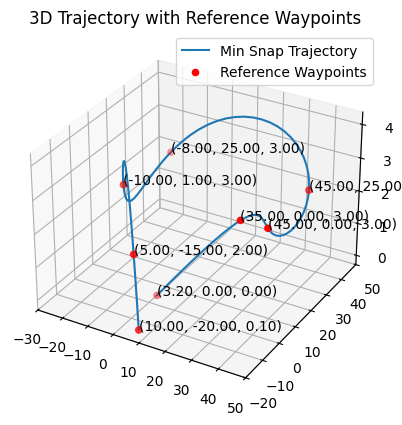

In [54]:
# t = np.linspace(0, 70, 100)
# #  Sample up to the 3rd order (Jerk) -----v
# pva = ms.compute_trajectory_derivatives(polys, t, 3)
# position = pva[0, ...]
velocity = pva[1, ...]
print(position)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2], label="Min Snap Trajectory")
control_point = [(x0, y0, 0),  (35.0, 0.0, alt), (45.0, 0.0, alt), (45.0, 25.0, alt), (-8.0, 25.0, alt), (-10.0, 1.0,alt), (5, -15.0, 2.0), (xf, yf,0.1)]

control_point = np.array(control_point)
ax.scatter(control_point[:, 0], control_point[:, 1], control_point[:, 2], color='r', label="Reference Waypoints")
for i, point in enumerate(control_point):
    ax.text(point[0], point[1], point[2], f'({point[0]:.2f}, {point[1]:.2f}, {point[2]:.2f})', 
            color='black', fontsize=10)
ax.set_xlim(-30, 50)
ax.set_ylim(-20, 50)
ax.legend()
plt.title("3D Trajectory with Reference Waypoints")
plt.show()

In [ ]:
t = np.linspace(0, 15, 100)
states, inputs = ms.compute_quadrotor_trajectory(
    polys,
    t,
    vehicle_mass=1.0, # Quadrotor weight
    yaw="velocity", # Align yaw angle to quadrotor velocity
    drag_params=ms.RotorDragParameters(0.1, 0.2, 1.0),
)